In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
netflix_data = pd.read_csv("netflix.csv")

In [3]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
netflix_data.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
netflix_data.shape

(8807, 12)

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix_data.duplicated().sum()

0

**Data visualization**

In [9]:
mpl.rcParams["font.family"] = "Times New Roman"

In [10]:
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha= "center", 
                    va= "bottom", 
                    fontsize= 11, 
                    color= "black")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'show_id'),
  Text(1.5, 0, 'type'),
  Text(2.5, 0, 'title'),
  Text(3.5, 0, 'director'),
  Text(4.5, 0, 'cast'),
  Text(5.5, 0, 'country'),
  Text(6.5, 0, 'date_added'),
  Text(7.5, 0, 'release_year'),
  Text(8.5, 0, 'rating'),
  Text(9.5, 0, 'duration'),
  Text(10.5, 0, 'listed_in'),
  Text(11.5, 0, 'description')])

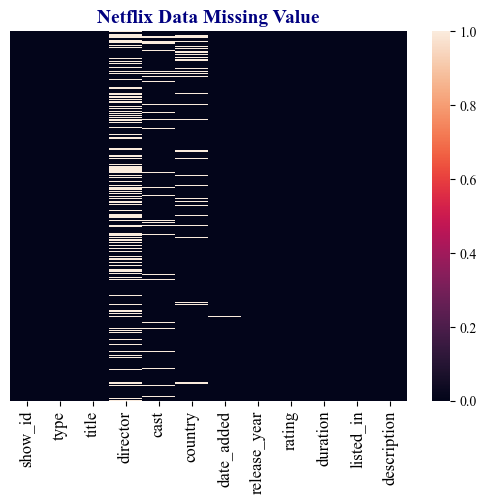

In [11]:
sns.heatmap(data= netflix_data.isna(), yticklabels= False, cbar= True)
plt.title("Netflix Data Missing Value", fontsize= 14, fontweight= "bold", color= "navy")
plt.xticks(fontsize= 12)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\175272586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= netflix_data,


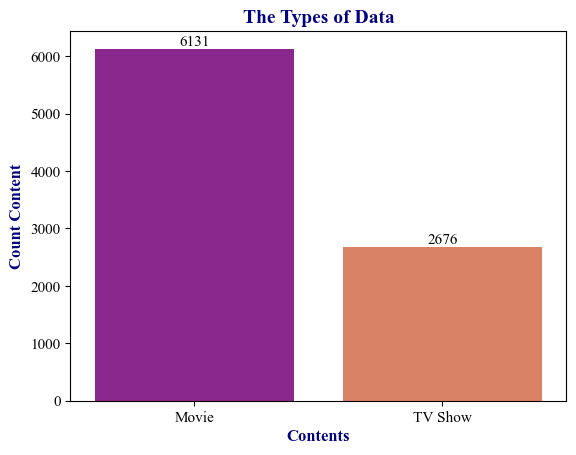

In [12]:
sns.countplot(data= netflix_data, 
              x= "type", 
              palette= "plasma")

plt.title("The Types of Data", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Contents", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Count Content", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

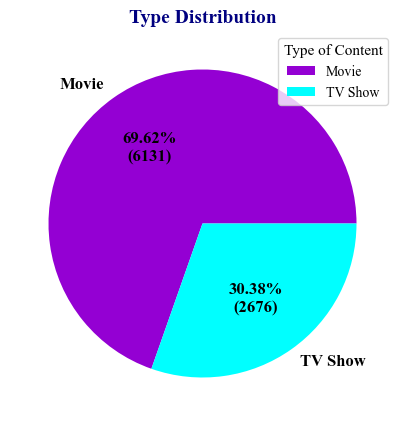

In [13]:
types = netflix_data.groupby("type").size()

types.plot.pie(figsize = (5, 5),
               colors = ["darkviolet", "cyan"],
               textprops = {"fontsize": 12, "color": "k", "fontweight": "bold",},
               autopct = lambda p : "{:.2f}%\n({:.0f})".format(p, (p / 100) * types.sum()))

plt.title("Type Distribution", fontsize = 14, fontweight= "bold", color= "navy")
plt.axis("off")
plt.legend(title="Type of Content", fontsize=10, title_fontsize=11)

In [14]:
tv = netflix_data[netflix_data["type"] == "TV Show"]
movie = netflix_data[netflix_data["type"] == "Movie"]

In [15]:
tv.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [16]:
tv.shape

(2676, 12)

In [17]:
movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [18]:
movie.shape

(6131, 12)

*Top Rating*

In [19]:
tv["rating"].value_counts()

rating
TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\2524536964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= tv,


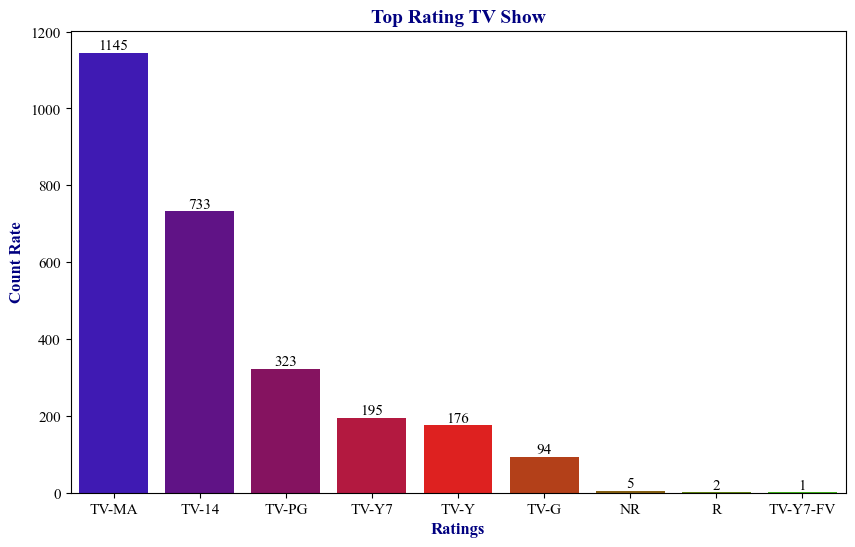

In [20]:
plt.figure(figsize= (10, 6))

sns.countplot(data= tv, 
              x= "rating", 
              order= tv["rating"].value_counts().index[0:10], 
              palette= "brg")

plt.title("Top Rating TV Show", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Ratings", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Count Rate", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

In [21]:
movie["rating"].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\149887940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= movie,


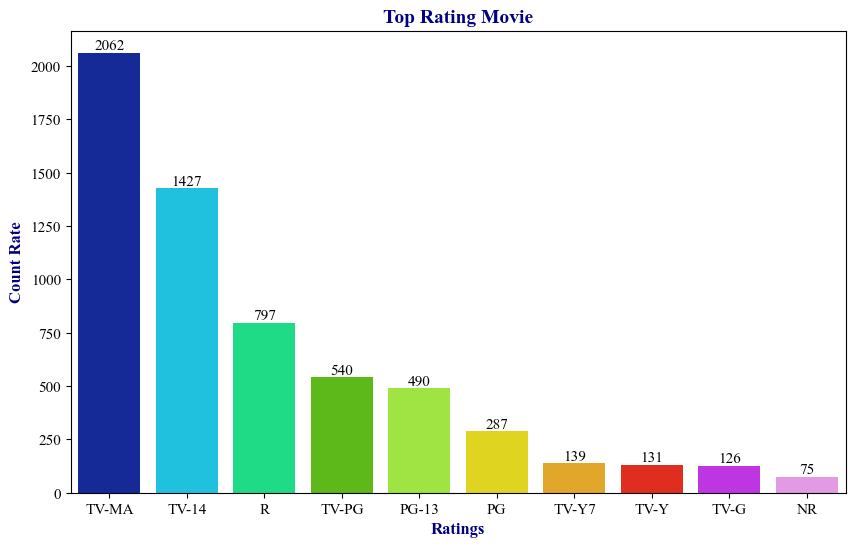

In [22]:
plt.figure(figsize= (10, 6))

sns.countplot(data= movie, 
              x= "rating", 
              order= movie["rating"].value_counts().index[0:10], 
              palette= "gist_ncar")

plt.title("Top Rating Movie", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Ratings", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Count Rate", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\3648040387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= tv,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2020'),
  Text(0, 1, '2019'),
  Text(0, 2, '2018'),
  Text(0, 3, '2021'),
  Text(0, 4, '2017'),
  Text(0, 5, '2016'),
  Text(0, 6, '2015'),
  Text(0, 7, '2014'),
  Text(0, 8, '2012'),
  Text(0, 9, '2013'),
  Text(0, 10, '2010'),
  Text(0, 11, '2011'),
  Text(0, 12, '2009'),
  Text(0, 13, '2008'),
  Text(0, 14, '2006')])

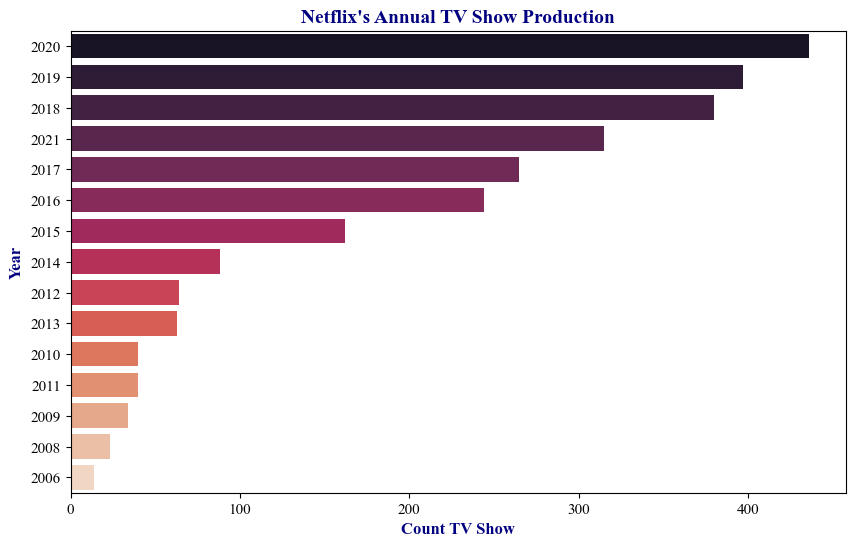

In [23]:
plt.figure(figsize= (10, 6))

sns.countplot(data= tv, 
              y= "release_year", 
              order= tv["release_year"].value_counts().index[0:15], 
              palette= "rocket")

plt.title("Netflix's Annual TV Show Production", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Count TV Show", fontsize= 12, fontweight= "bold",  color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Year", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\2166742548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= movie,


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2017'),
  Text(0, 1, '2018'),
  Text(0, 2, '2016'),
  Text(0, 3, '2019'),
  Text(0, 4, '2020'),
  Text(0, 5, '2015'),
  Text(0, 6, '2021'),
  Text(0, 7, '2014'),
  Text(0, 8, '2013'),
  Text(0, 9, '2012'),
  Text(0, 10, '2010'),
  Text(0, 11, '2011'),
  Text(0, 12, '2009'),
  Text(0, 13, '2008'),
  Text(0, 14, '2006')])

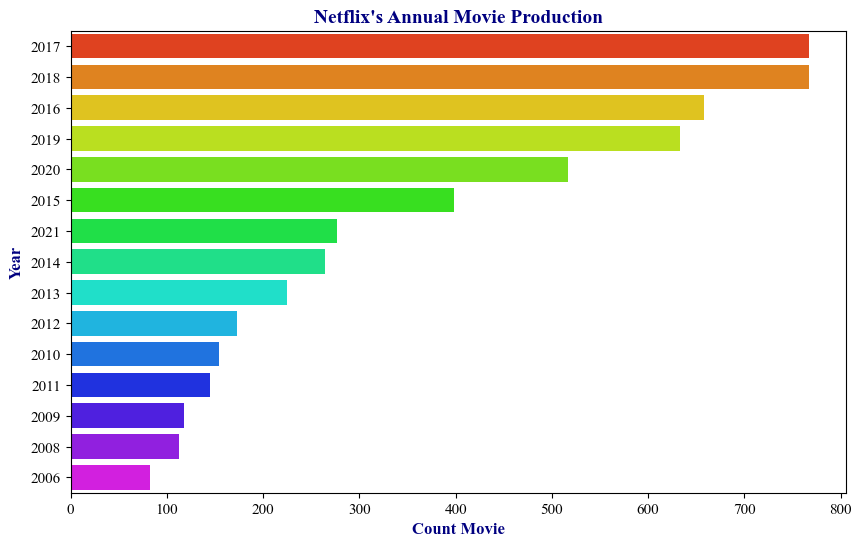

In [24]:
plt.figure(figsize= (10, 6))

sns.countplot(data= movie, 
              y= "release_year", 
              order= movie["release_year"].value_counts().index[0:15], 
              palette= "gist_rainbow")

plt.title("Netflix's Annual Movie Production", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Count Movie", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Year", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

*Top Countries*

In [25]:
tv["country"].value_counts().head(12)

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Mexico             40
China              38
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\2323987922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= tv[tv["country"].isin(tv_top_country.index)],


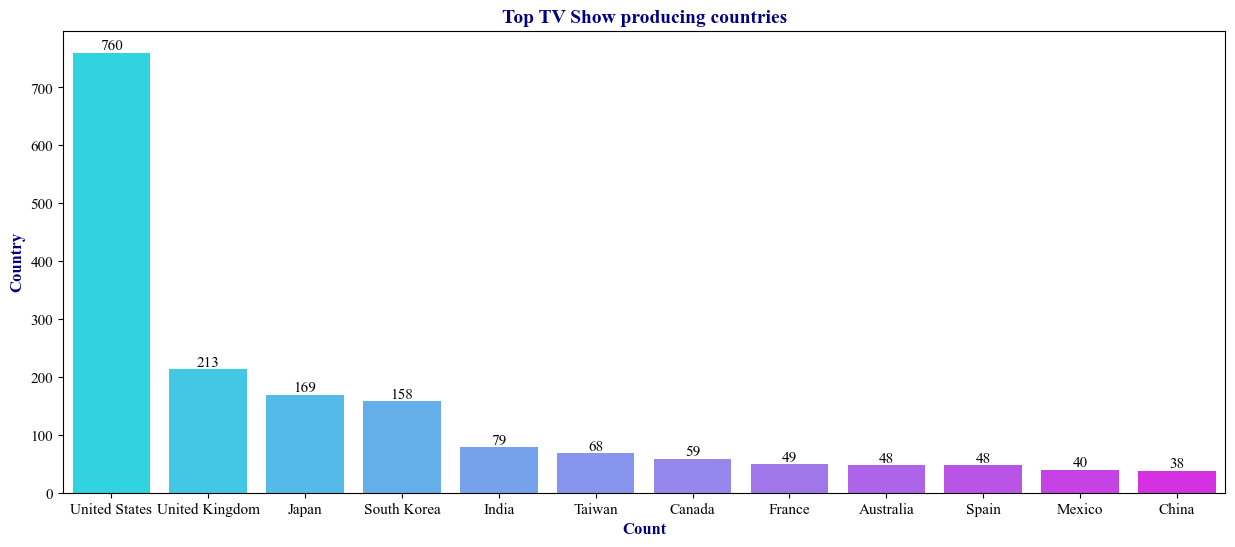

In [26]:
tv_top_country = tv["country"].value_counts().head(12)

plt.figure(figsize= (15, 6))
sns.countplot(data= tv[tv["country"].isin(tv_top_country.index)], 
              x= "country", 
              order= tv_top_country.index, 
              palette= "cool")

plt.title("Top TV Show producing countries", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Count", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Country", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

In [27]:
movie["country"].value_counts().head(12)

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
France              75
Philippines         73
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\2425223908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= movie[movie["country"].isin(movie_top_country.index)],


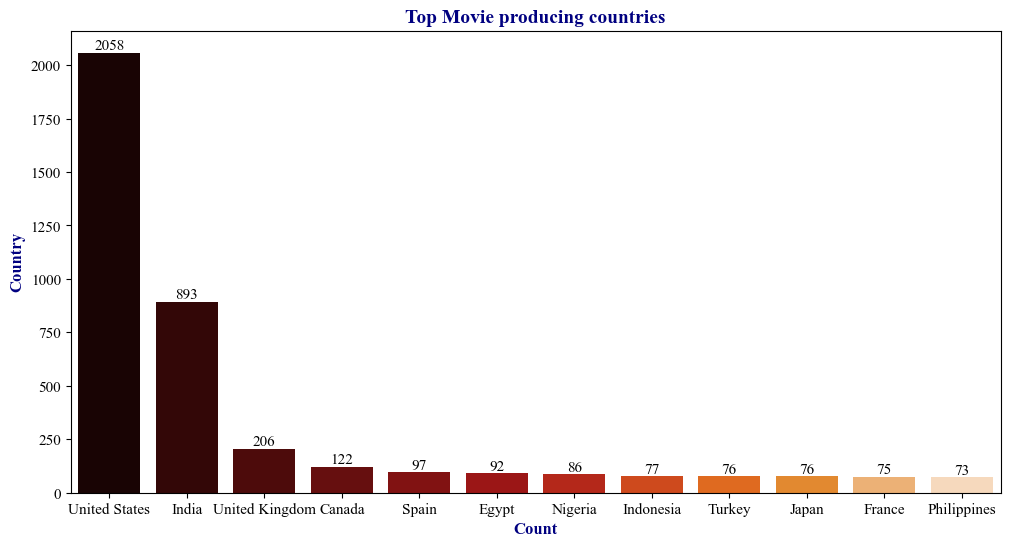

In [28]:
movie_top_country = movie["country"].value_counts().head(12)

plt.figure(figsize= (12, 6))
sns.countplot(data= movie[movie["country"].isin(movie_top_country.index)], 
              x= "country", 
              order= movie_top_country.index, 
              palette= "gist_heat")

plt.title("Top Movie producing countries", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Count", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Country", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

*Comparison of Movies and TV Show*

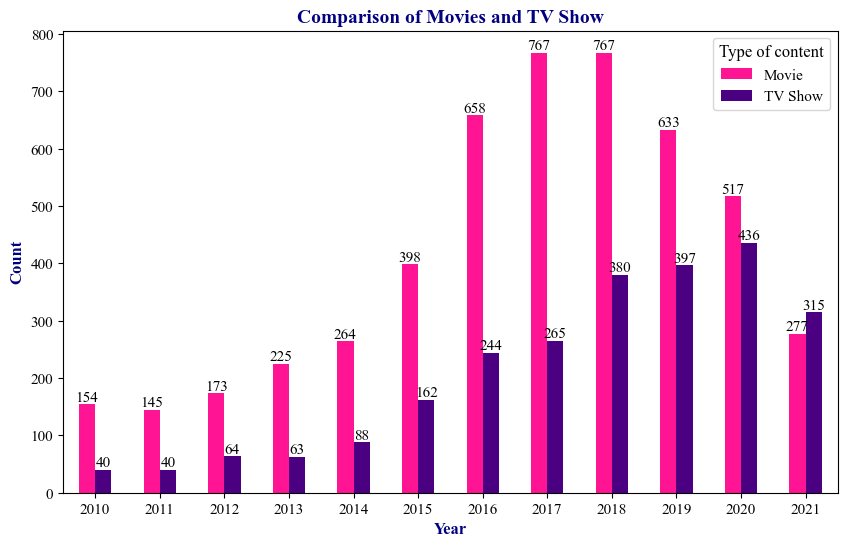

In [29]:
current_year = 2022
start_year = current_year - 12

filtered_data = netflix_data[(netflix_data["release_year"] >= start_year) & (netflix_data["release_year"] <= current_year)]

count_data = filtered_data.groupby(["release_year", "type"]).size().unstack(fill_value= 0)

count_data.plot(kind= "bar", 
                stacked= False, 
                figsize= (10, 6),
                color= {"indigo", "deeppink"})

plt.title("Comparison of Movies and TV Show", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Year", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(rotation= 0, fontsize = 11)
plt.ylabel("Count", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)
plt.legend(title= "Type of content", title_fontsize= "12", fontsize= "11", loc= "upper right", frameon= True)

annotate_bars(plt.gca())


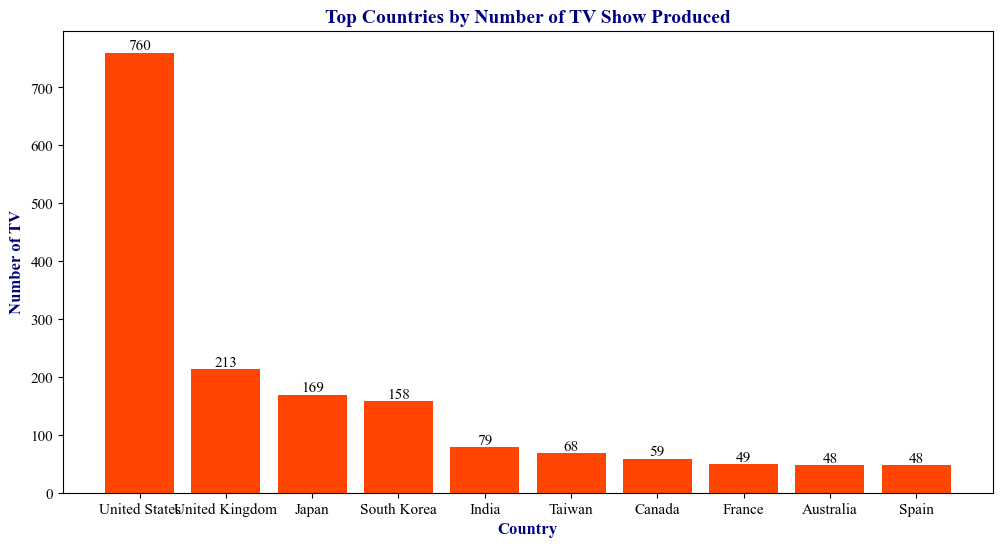

In [30]:
country_tv_count = tv.groupby("country").size().reset_index(name= "count")
country_tv_count = country_tv_count.sort_values(by= "count", ascending= False)
top_countries = country_tv_count.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries["country"], 
        top_countries["count"], 
        color= "orangered")

plt.title("Top Countries by Number of TV Show Produced", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Country", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(rotation= 0, fontsize = 11)
plt.ylabel("Number of TV", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

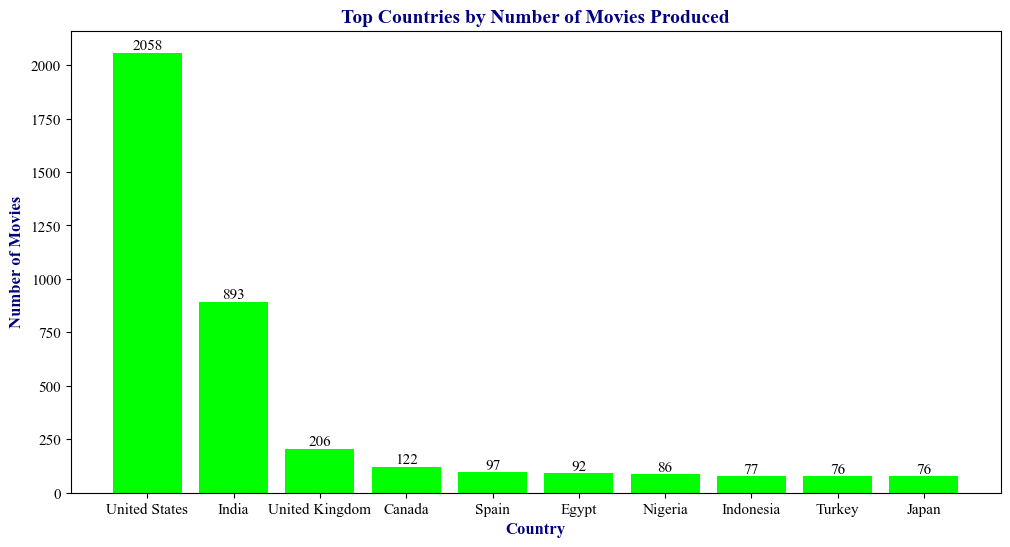

In [31]:
country_movie_count = movie.groupby("country").size().reset_index(name= "count")
country_movie_count = country_movie_count.sort_values(by= "count", ascending= False)
top_countries = country_movie_count.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_countries["country"], 
        top_countries["count"], 
        color= "lime")

plt.title("Top Countries by Number of Movies Produced", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Country", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Number of Movies", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

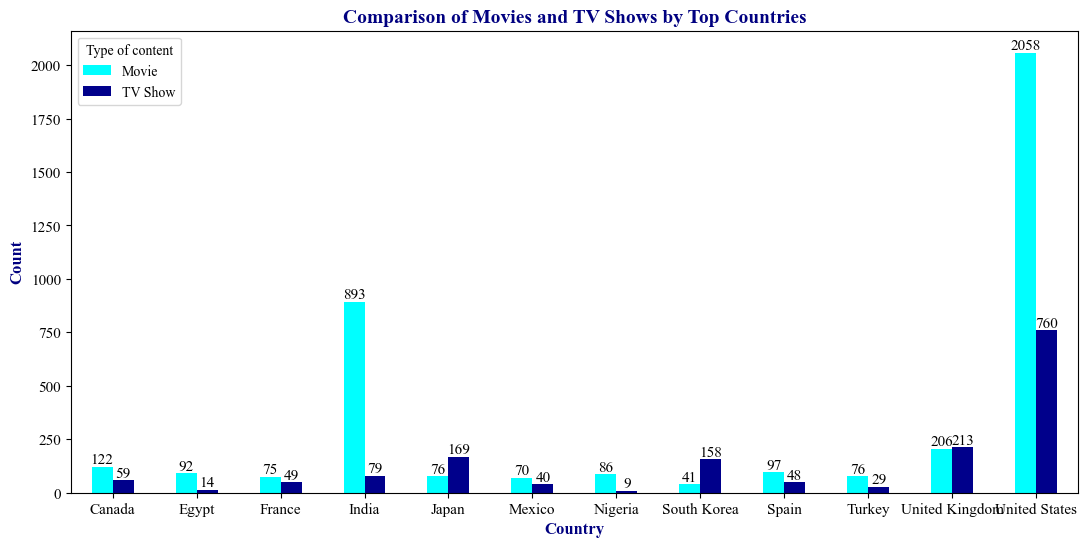

In [32]:
top_countries = netflix_data["country"].value_counts().nlargest(12).index  
filtered_data = netflix_data[netflix_data["country"].isin(top_countries)]
count_data = filtered_data.groupby(["country", "type"]).size().unstack(fill_value= 0)

count_data.plot(kind= "bar", 
                stacked= False, 
                figsize= (13, 6), 
                color= {"darkblue", "cyan"})

plt.title("Comparison of Movies and TV Shows by Top Countries", fontsize= 14, fontweight= "bold", color= "navy")
plt.xlabel("Country", fontsize= 12, fontweight= "bold", color= "navy")
plt.xticks(rotation= 0, fontsize = 11)
plt.ylabel("Count", fontsize= 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)
plt.legend(title= "Type of content")

annotate_bars(plt.gca())

*Show Netflix's TV Shows based on their number of seasons*

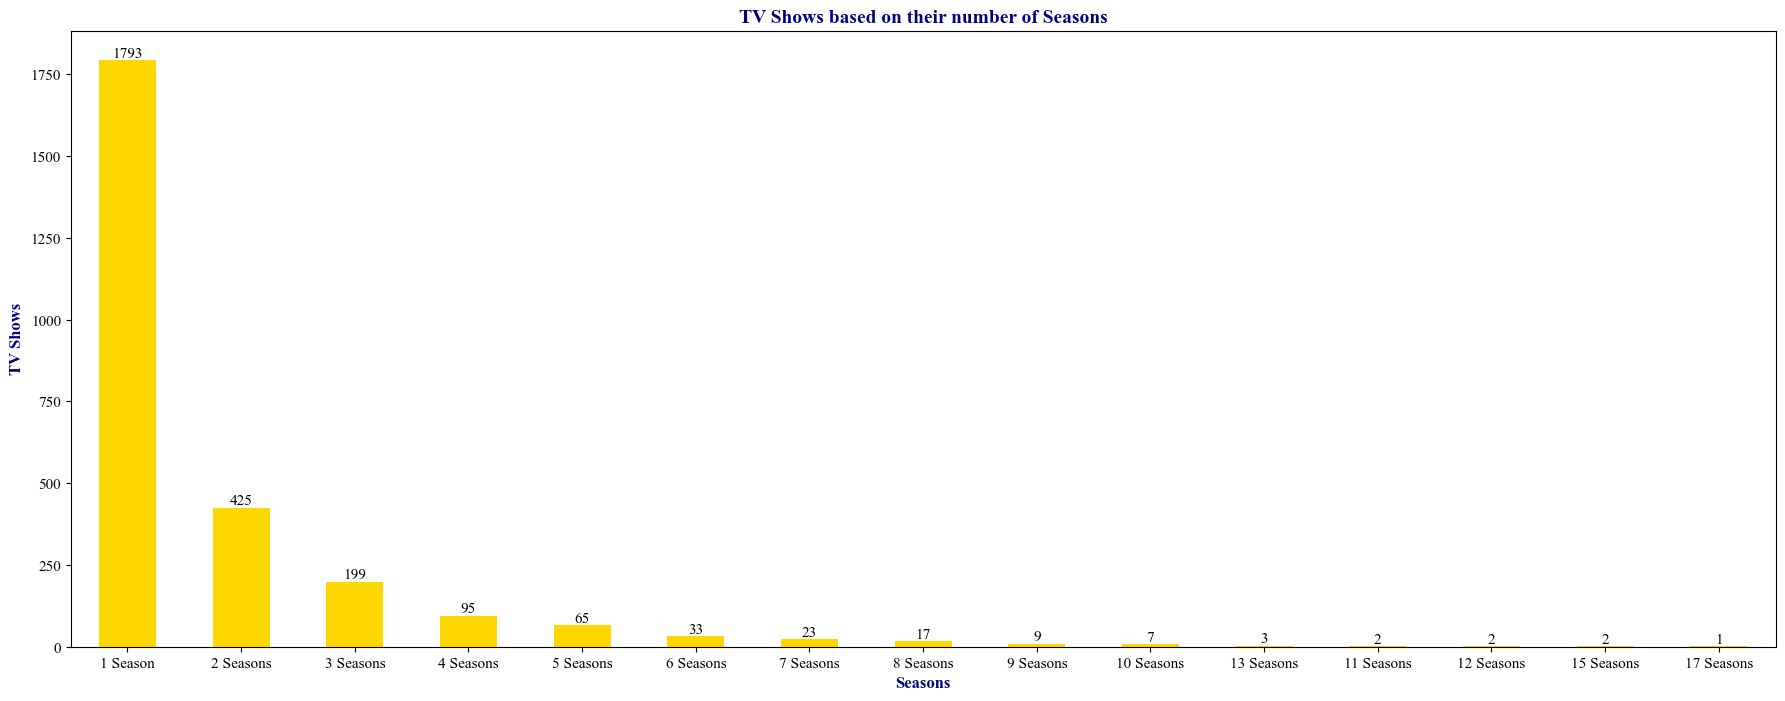

In [33]:
tv_season = tv.groupby(["duration"]).size()

tv_season.sort_values(ascending= False).plot.bar(figsize = (22, 8), color= "gold")
# for idx, count in enumerate(list(tv_season.sort_values(ascending= False))):
    # plt.text(idx, count, str(count), horizontalalignment= "center", fontsize= 11, color= "purple")

plt.title("TV Shows based on their number of Seasons", fontsize = 14, fontweight= "bold", color= "navy")
plt.xlabel("Seasons", fontsize = 12, fontweight= "bold", color= "navy")
plt.xticks(rotation = 0, fontsize = 11)
plt.ylabel("TV Shows", fontsize = 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

annotate_bars(plt.gca())

*Analyze duration*

In [34]:
movie["duration"].isna().sum()

3

In [35]:
movie["duration"] = movie["duration"].str.replace(" min", "")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\1055628230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie["duration"] = movie["duration"].str.replace(" min", "")


In [36]:
movie["duration"] = movie["duration"].astype(float)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\3475879699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie["duration"] = movie["duration"].astype(float)


In [37]:
movie["duration"]

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\2239062443.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movie["duration"], shade= True, color= "Navy")


(array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0025, '0.0025'),
  Text(0, 0.005, '0.0050'),
  Text(0, 0.0075, '0.0075'),
  Text(0, 0.01, '0.0100'),
  Text(0, 0.0125, '0.0125'),
  Text(0, 0.015, '0.0150'),
  Text(0, 0.0175, '0.0175'),
  Text(0, 0.02, '0.0200'),
  Text(0, 0.0225, '0.0225')])

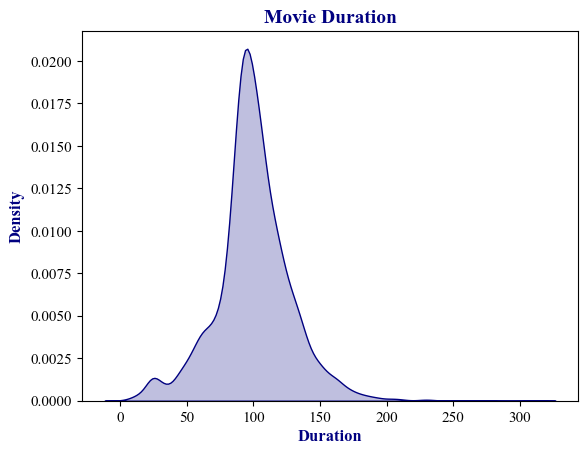

In [38]:
sns.kdeplot(movie["duration"], shade= True, color= "Navy")

plt.title("Movie Duration", fontsize = 14, fontweight= "bold", color= "navy")
plt.xlabel("Duration", fontsize = 12, fontweight= "bold", color= "navy")
plt.xticks(fontsize = 11)
plt.ylabel("Density", fontsize = 12, fontweight= "bold", color= "navy")
plt.yticks(fontsize = 11)

In [39]:
from collections import Counter

In [40]:
tv["listed_in"].head()

1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
Name: listed_in, dtype: object

In [41]:
genres_tv = list(tv["listed_in"])
gen_tv = []

for i in genres_tv:
    lst = list(i.split(","))
    for j in lst:
        gen_tv.append(j.replace(" ", ""))

g_tv = Counter(gen_tv)

In [42]:
genres_tv

['International TV Shows, TV Dramas, TV Mysteries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Docuseries, Reality TV',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'TV Dramas, TV Horror, TV Mysteries',
 'British TV Shows, Reality TV',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'British TV Shows, Crime TV Shows, Docuseries',
 'TV Comedies, TV Dramas',
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'Crime TV Shows, Docuseries, International TV Shows',
 'International TV Shows, TV Action & Adventure, TV Dramas',
 'Docuseries, International TV Shows, Reality TV',
 'TV Comedies',
 'British TV Shows, International TV Shows, TV Comedies',
 'International TV Shows, TV Dramas, TV Thrillers',
 "Kids' TV",
 "Kids' TV, TV Comedies",
 "Kids' TV",
 "Kids' TV, TV Sci-Fi & Fantasy",
 'Internationa

In [43]:
g_tv

Counter({'InternationalTVShows': 1351,
         'TVDramas': 763,
         'TVComedies': 581,
         'CrimeTVShows': 470,
         "Kids'TV": 451,
         'Docuseries': 395,
         'RomanticTVShows': 370,
         'RealityTV': 255,
         'BritishTVShows': 253,
         'AnimeSeries': 176,
         'Spanish-LanguageTVShows': 174,
         'TVAction&Adventure': 168,
         'KoreanTVShows': 151,
         'TVMysteries': 98,
         'Science&NatureTV': 92,
         'TVSci-Fi&Fantasy': 84,
         'TVHorror': 75,
         'TeenTVShows': 69,
         'TVThrillers': 57,
         'Stand-UpComedy&TalkShows': 56,
         'Classic&CultTV': 28,
         'TVShows': 16})

In [44]:
movie["listed_in"].head()

0                                        Documentaries
6                             Children & Family Movies
7     Dramas, Independent Movies, International Movies
9                                     Comedies, Dramas
12                        Dramas, International Movies
Name: listed_in, dtype: object

In [45]:
genres_movie = list(movie["listed_in"])
gen_movie = []

for i in genres_movie:
    lst = list(i.split(","))
    for j in lst:
        gen_movie.append(j.replace(" ",""))
        
g_movie = Counter(gen_movie)

In [46]:
genres_movie

['Documentaries',
 'Children & Family Movies',
 'Dramas, Independent Movies, International Movies',
 'Comedies, Dramas',
 'Dramas, International Movies',
 'Children & Family Movies, Comedies',
 'Documentaries, International Movies',
 'Thrillers',
 'Comedies, International Movies',
 'Children & Family Movies',
 'Comedies, International Movies, Romantic Movies',
 'Comedies, International Movies, Music & Musicals',
 'Comedies',
 'Horror Movies, Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas, Independent Movies, International Movies',
 'Dramas, International Movies, Thrillers',
 'Action & Adventure, Dramas, International Movies',
 'Action & Adventure, Dramas',
 'Action & Adventure, Classic Movies, Dramas',
 'Dramas, Horror Movies, Thrillers',
 'Action & Adventure, Horror Movies, Thrillers',
 'Action & Adventure, Horror Movies, Thrillers',
 'Documentaries',
 'Action & Adventure',
 'Dramas, Thrillers',
 'Action & Adventure, Anime Features, International Movies',
 'Action & Adventure, Anime Featur

In [47]:
g_movie

Counter({'InternationalMovies': 2752,
         'Dramas': 2427,
         'Comedies': 1674,
         'Documentaries': 869,
         'Action&Adventure': 859,
         'IndependentMovies': 756,
         'Children&FamilyMovies': 641,
         'RomanticMovies': 616,
         'Thrillers': 577,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Stand-UpComedy': 343,
         'Sci-Fi&Fantasy': 243,
         'SportsMovies': 219,
         'ClassicMovies': 116,
         'LGBTQMovies': 102,
         'AnimeFeatures': 71,
         'CultMovies': 71,
         'Faith&Spirituality': 65,
         'Movies': 57})

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from PIL import Image

(-0.5, 399.5, 199.5, -0.5)

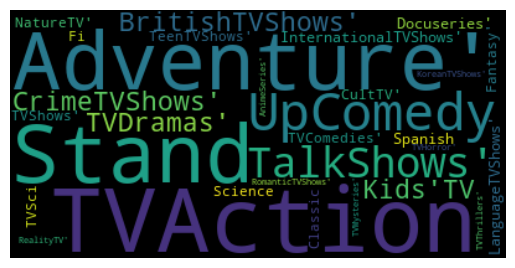

In [49]:
txt_tv = list(set(gen_tv))

wordcloud = WordCloud(max_words= 1000000,
                      background_color= "black").generate(str(txt_tv))

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

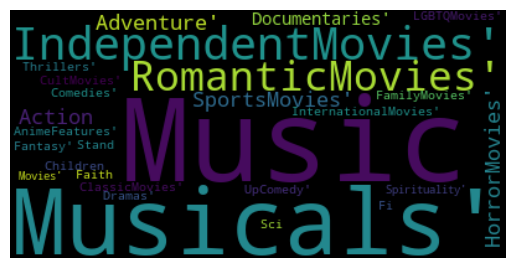

In [50]:
txt_movie = list(set(gen_movie))

wordcloud = WordCloud(max_words= 1000000,
                      background_color= "black").generate(str(txt_movie))

plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\3453068154.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation = 90, fontsize = 11)


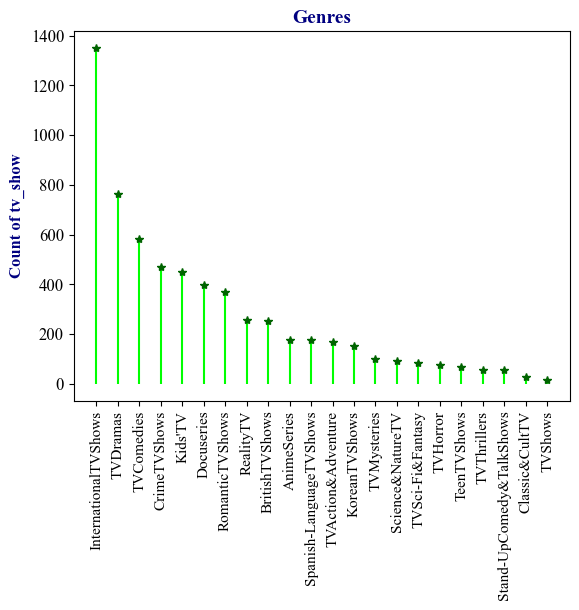

<Figure size 640x480 with 0 Axes>

In [51]:
g_tv_plot = {k: v for k, v in sorted(g_tv.items(), key= lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

fig = plt.figure()

x=list(g_tv_plot.keys())
y=list(g_tv_plot.values())

ax.vlines(x, ymin= 0, ymax= y, color= "lime")
ax.plot(x, y, "*", color= "darkgreen")
ax.set_title("Genres", fontsize = 14, fontweight= "bold", color= "navy")
ax.set_xticklabels(x, rotation = 90, fontsize = 11)
ax.set_ylabel("Count of tv_show", fontsize = 12, fontweight= "bold", color= "navy")

for label in ax.get_yticklabels():
    label.set_fontname("Times New Roman")
    label.set_fontsize(12)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_7388\4072898129.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation = 90, fontsize= 12)


Text(0, 0.5, 'Count of movie')

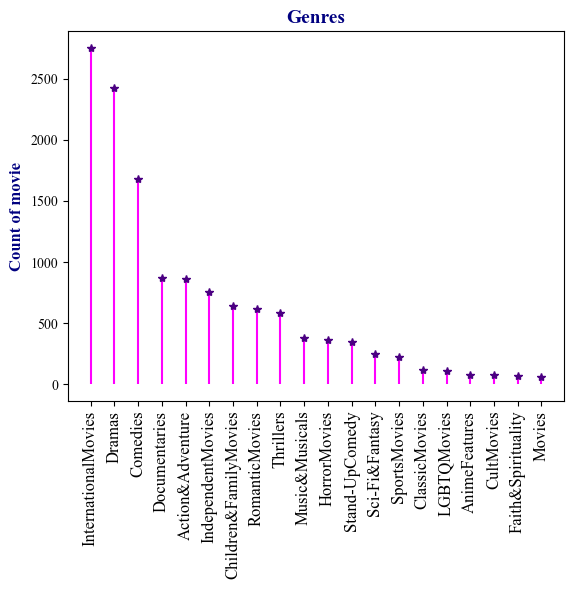

<Figure size 640x480 with 0 Axes>

In [52]:
g_movie_plot = {k: v for k, v in sorted(g_movie.items(), key= lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

fig = plt.figure()

x=list(g_movie_plot.keys())
y=list(g_movie_plot.values())

ax.vlines(x, ymin= 0, ymax= y, color= "magenta")
ax.plot(x, y, "*", color= "indigo")
ax.set_title("Genres", fontsize = 14, fontweight= "bold", color= "navy")
ax.set_xticklabels(x, rotation = 90, fontsize= 12)
ax.set_ylabel("Count of movie", fontsize= 12, fontweight= "bold", color= "navy")


***Recommendation System***

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tf_idf = TfidfVectorizer(stop_words= "english")

netflix_data["description"] = netflix_data["description"].fillna("")

tf_idf_fit = tf_idf.fit_transform(netflix_data["description"])
tf_idf_fit.shape

(8807, 18895)

In [55]:
from sklearn.metrics.pairwise import linear_kernel

In [56]:
cosin_similarity = linear_kernel(tf_idf_fit, tf_idf_fit)

In [57]:
print(cosin_similarity)

[[1.         0.         0.         ... 0.         0.01538292 0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.01538292 0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


In [58]:
series_title = pd.Series(netflix_data.index, index = netflix_data["title"])
series_title

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [59]:
def Recommendation(title, cosin_similarity= cosin_similarity):
    idx = series_title[title]
    sim_score = list(enumerate(cosin_similarity[idx]))
    sim_score = sorted(sim_score, key= lambda x:x[1], reverse= True)
    sim_score = sim_score[1:11]
    recomm = [i[0] for i in sim_score]
    return netflix_data["title"].iloc[recomm]

In [60]:
Recommendation("Peaky Blinders")

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [61]:
Recommendation("Friends")

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object

In [62]:
Recommendation("Narcos")

7463                          Miss Dynamite
6673                            El Cartel 2
2921                         Narcos: Mexico
4750                               El Chapo
310     Cocaine Cowboys: The Kings of Miami
1268                   El final del paraíso
5822                                Cocaine
3425                            Street Flow
4456                         Raja Natwarlal
2                                 Ganglands
Name: title, dtype: object